# Credit Card Customer Segmentation and Churn Prediction

# **Upload Dataset**

In [ ]:
!git clone https://github.com/Walmond3/WIH3004-TIDS

Cloning into 'WIH3004-TIDS'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 373.74 KiB | 3.85 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.mixture import GaussianMixture

In [ ]:
df = pd.read_csv("/content/WIH3004-TIDS/BankChurners.csv", delimiter=",")
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

# **Data Preprocessing**

In [ ]:
# check for missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df = df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# check for duplicated rows
duplicated_rows = df.duplicated().any()
print("Duplicated rows?", duplicated_rows)

Duplicated rows? False


In [ ]:
# Normalization
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer     -0.165406      M         0.503368   
1      Existing Customer      0.333570      F         2.043199   
2      Existing Customer      0.583058      M         0.503368   
3      Existing Customer     -0.789126      F         1.273283   
4      Existing Customer     -0.789126      M         0.503368   
...                  ...           ...    ...              ...   
10122  Existing Customer      0.458314      M        -0.266547   
10123  Attrited Customer     -0.664382      M        -0.266547   
10124  Attrited Customer     -0.290150      F        -1.036462   
10125  Attrited Customer     -2.036565      M        -0.266547   
10126  Attrited Customer     -0.414894      F        -0.266547   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            0.384621                  0.763943               -1.327136   
1            1.010715                  1.407306               -1.327136   
2            0.008965                  0.120579               -1.327136   
3           -0.241473                 -0.522785                1.641478   
4           -1.869317                  0.763943               -1.327136   
...               ...                       ...                     ...   
10122        0.509840                 -0.522785               -0.337598   
10123       -1.368442                  0.120579               -0.337598   
10124        0.008965                  0.763943                0.651940   
10125        0.008965                  0.120579                0.651940   
10126       -1.368442                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771         3.259358        2.221481   
10123        -0.591639

In [ ]:
# Check the unique values
object_cols = df.select_dtypes(include=['object']).columns
for i in object_cols:
  print(f"Unique values for {i}:")
  print(df[i].unique())
  print()

Unique values for Attrition_Flag:
['Existing Customer' 'Attrited Customer']

Unique values for Gender:
['M' 'F']

Unique values for Education_Level:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Unique values for Marital_Status:
['Married' 'Single' 'Unknown' 'Divorced']

Unique values for Income_Category:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Unique values for Card_Category:
['Blue' 'Gold' 'Silver' 'Platinum']



In [ ]:
# Data imputation to replace "Unknown" values
# Replace by predicting based on the values in other features

# Step 1: Replace "Unknown" to missing value
columns_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']
df[columns_to_impute] = df[columns_to_impute].replace("Unknown", np.nan)
unknown_count = df[columns_to_impute].isnull().sum()
print("Number of missing values:")
print(unknown_count)

Number of missing values:
Education_Level    1519
Marital_Status      749
Income_Category    1112
dtype: int64


In [ ]:
# Got null values present in the columns_to_impute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  float64
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  float64
 14  Avg_Op

In [ ]:
# Split the data into complete and incomplete set
complete_data = df.dropna(subset=columns_to_impute) # no null values
incomplete_data = df[df[columns_to_impute].isna().any(axis=1)] # with null values

# Step 2: Encode all the categorical data
label_encoders = {}
for col in object_cols:
  label_encoders[col] = LabelEncoder()
  complete_data[col] = label_encoders[col].fit_transform(complete_data[col])
  incomplete_data[col] = label_encoders[col].fit_transform(incomplete_data[col])

# All columns are now numerical
print('Complete Dataframe:')
print(complete_data.info())
print('\n\n')
print('Incomplete Dataframe:')
print(incomplete_data.info())

Complete Dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Customer_Age              7081 non-null   float64
 2   Gender                    7081 non-null   int64  
 3   Dependent_count           7081 non-null   float64
 4   Education_Level           7081 non-null   int64  
 5   Marital_Status            7081 non-null   int64  
 6   Income_Category           7081 non-null   int64  
 7   Card_Category             7081 non-null   int64  
 8   Months_on_book            7081 non-null   float64
 9   Total_Relationship_Count  7081 non-null   float64
 10  Months_Inactive_12_mon    7081 non-null   float64
 11  Contacts_Count_12_mon     7081 non-null   float64
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   float

<ipython-input-11-c4ee6489a39e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[col] = label_encoders[col].fit_transform(complete_data[col])
<ipython-input-11-c4ee6489a39e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data[col] = label_encoders[col].fit_transform(incomplete_data[col])
<ipython-input-11-c4ee6489a39e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
# Step 3: Build prediction model - Random Forest Classifier
X_complete = complete_data.drop(columns=columns_to_impute)
X_incomplete = incomplete_data.drop(columns=columns_to_impute)

imputed_data = incomplete_data.copy()

for col in columns_to_impute:
  y_complete = complete_data[col]

  model = RandomForestClassifier()
  model.fit(X_complete, y_complete)

  predicted_values = model.predict(X_incomplete)

  # Integrate predicted values
  imputed_data[col] = predicted_values

print('Missing values after imputation?')
print(imputed_data.isnull().sum())

Missing values after imputation?
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
# Combine 2 df as a single final df that will be used afterwards
df_impute = pd.concat([complete_data, imputed_data])
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 0 to 10125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  float64
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  float64
 14  Avg_Open_To

In [ ]:
df_impute

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1     -0.165406       1         0.503368                3   
1                   1      0.333570       0         2.043199                2   
2                   1      0.583058       1         0.503368                2   
4                   1     -0.789126       1         0.503368                5   
5                   1     -0.290150       1        -0.266547                2   
...               ...           ...     ...              ...              ...   
10101               1     -0.539638       1        -0.266547                2   
10118               0      0.458314       1        -1.036462                3   
10119               0      1.082034       0         0.503368                3   
10123               0     -0.664382       1        -0.266547                2   
10125               0     -2.036565       1        -0.266547                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0        0.384621   
1                   2                4              0        1.010715   
2                   1                3              0        0.008965   
4                   1                2              0       -1.869317   
5                   1                1              0        0.008965   
...               ...              ...            ...             ...   
10101               1                1              0       -0.742348   
10118               2                3              0        0.008965   
10119               2                1              0        1.386371   
10123               1                3              0       -1.368442   
10125               2                2              0        0.008965   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
4                      0.763943               -1.327136   
5                     -0.522785               -1.327136   
...                         ...                     ...   
10101                 -0.522785               -0.337598   
10118                  1.407306                0.651940   
10119                  0.120579                0.651940   
10123                  0.120579               -0.337598   
10125                  0.120579                0.651940   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
4                  -2.219655     -0.430877            -1.426858   
5                  -0.411616     -0.508559             0.103302   
...                      ...           ...                  ...   
10101               2.300443     -0.538818             0.687389   
10118               1.396424      0.146017            -0.258684   
10119               0.492404      0.662943             1.661686   
10123               0.492404     -0.479181             1.255524   
10125               0.492404     -0.368710            -1.426858   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
5            -0.517714              2.810542        -0.976192       -1.740786   
...                ...                   ...              ...             ...   
10101        -0.600330             -0.752480         2.972337        1.15635

In [ ]:
df_after_impute = df_impute.copy()

for col in object_cols:
    # Inverse transform the encoded values back to original values
    df_after_impute[col] = label_encoders[col].inverse_transform(df_after_impute[col].astype(int))

In [ ]:
df_impute

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1     -0.165406       1         0.503368                3   
1                   1      0.333570       0         2.043199                2   
2                   1      0.583058       1         0.503368                2   
4                   1     -0.789126       1         0.503368                5   
5                   1     -0.290150       1        -0.266547                2   
...               ...           ...     ...              ...              ...   
10101               1     -0.539638       1        -0.266547                2   
10118               0      0.458314       1        -1.036462                3   
10119               0      1.082034       0         0.503368                3   
10123               0     -0.664382       1        -0.266547                2   
10125               0     -2.036565       1        -0.266547                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0        0.384621   
1                   2                4              0        1.010715   
2                   1                3              0        0.008965   
4                   1                2              0       -1.869317   
5                   1                1              0        0.008965   
...               ...              ...            ...             ...   
10101               1                1              0       -0.742348   
10118               2                3              0        0.008965   
10119               2                1              0        1.386371   
10123               1                3              0       -1.368442   
10125               2                2              0        0.008965   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
4                      0.763943               -1.327136   
5                     -0.522785               -1.327136   
...                         ...                     ...   
10101                 -0.522785               -0.337598   
10118                  1.407306                0.651940   
10119                  0.120579                0.651940   
10123                  0.120579               -0.337598   
10125                  0.120579                0.651940   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
4                  -2.219655     -0.430877            -1.426858   
5                  -0.411616     -0.508559             0.103302   
...                      ...           ...                  ...   
10101               2.300443     -0.538818             0.687389   
10118               1.396424      0.146017            -0.258684   
10119               0.492404      0.662943             1.661686   
10123               0.492404     -0.479181             1.255524   
10125               0.492404     -0.368710            -1.426858   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
5            -0.517714              2.810542        -0.976192       -1.740786   
...                ...                   ...              ...             ...   
10101        -0.600330             -0.752480         2.972337        1.15635

In [ ]:
df_after_impute

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer     -0.165406      M         0.503368   
1      Existing Customer      0.333570      F         2.043199   
2      Existing Customer      0.583058      M         0.503368   
4      Existing Customer     -0.789126      M         0.503368   
5      Existing Customer     -0.290150      M        -0.266547   
...                  ...           ...    ...              ...   
10101  Existing Customer     -0.539638      M        -0.266547   
10118  Attrited Customer      0.458314      M        -1.036462   
10119  Attrited Customer      1.082034      F         0.503368   
10123  Attrited Customer     -0.664382      M        -0.266547   
10125  Attrited Customer     -2.036565      M        -0.266547   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
5            Graduate        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10101        Graduate        Married     $40K - $60K          Blue   
10118     High School         Single    $80K - $120K          Blue   
10119     High School         Single     $40K - $60K          Blue   
10123        Graduate        Married    $80K - $120K          Blue   
10125        Graduate         Single     $60K - $80K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            0.384621                  0.763943               -1.327136   
1            1.010715                  1.407306               -1.327136   
2            0.008965                  0.120579               -1.327136   
4           -1.869317                  0.763943               -1.327136   
5            0.008965                 -0.522785               -1.327136   
...               ...                       ...                     ...   
10101       -0.742348                 -0.522785               -0.337598   
10118        0.008965                  1.407306                0.651940   
10119        1.386371                  0.120579                0.651940   
10123       -1.368442                  0.120579               -0.337598   
10125        0.008965                  0.120579                0.651940   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
4                  -2.219655     -0.430877            -1.426858   
5                  -0.411616     -0.508559             0.103302   
...                      ...           ...                  ...   
10101               2.300443     -0.538818             0.687389   
10118               1.396424      0.146017            -0.258684   
10119               0.492404      0.662943             1.661686   
10123               0.492404     -0.479181             1.255524   
10125               0.492404     -0.368710            -1.426858   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
5            -0.517714              2.810542        -0.976192       -1.740786   
...                ...                   ...              ...             ...   
10101        -0.600330             -0.752480         2.972337        1.156356   
10118         0.169177

In [ ]:
# Check the unique values in df after imputation
for i in object_cols:
  print(f"Unique values for {i}:")
  print(df_after_impute[i].unique())
  print()

Unique values for Attrition_Flag:
['Existing Customer' 'Attrited Customer']

Unique values for Gender:
['M' 'F']

Unique values for Education_Level:
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']

Unique values for Marital_Status:
['Married' 'Single' 'Divorced']

Unique values for Income_Category:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']

Unique values for Card_Category:
['Blue' 'Gold' 'Silver' 'Platinum']



In [ ]:
# Imbalanced data for existing and attrited customer
df_impute['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [ ]:
# Upsampling minority class
X = df_impute.drop(columns=['Attrition_Flag'])
y = df_impute['Attrition_Flag']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64

In [ ]:
# Final dataset to be used
df_final = X_resampled.join(y_resampled, rsuffix='_y')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              17000 non-null  float64
 1   Gender                    17000 non-null  int64  
 2   Dependent_count           17000 non-null  float64
 3   Education_Level           17000 non-null  int64  
 4   Marital_Status            17000 non-null  int64  
 5   Income_Category           17000 non-null  int64  
 6   Card_Category             17000 non-null  int64  
 7   Months_on_book            17000 non-null  float64
 8   Total_Relationship_Count  17000 non-null  float64
 9   Months_Inactive_12_mon    17000 non-null  float64
 10  Contacts_Count_12_mon     17000 non-null  float64
 11  Credit_Limit              17000 non-null  float64
 12  Total_Revolving_Bal       17000 non-null  float64
 13  Avg_Open_To_Buy           17000 non-null  float64
 14  Total_

In [ ]:
# check for duplicated rows
duplicated_rows = df_final.duplicated().any()
print("Duplicated rows?", duplicated_rows)

Duplicated rows? False


# **Prediction Model**

1. Predict customer attrition for a customer credit card portfolio

2. Help company to identify potential customer churn

In [ ]:
X = df_final.drop(columns=['Attrition_Flag'])
y = df_final['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print('Trainning Set\n---------------------')
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\n')
print('Validation Set\n---------------------')
print(f'X_val shape: {X_val.shape}\ny_val shape: {y_val.shape}\n')
print('Testing Set\n---------------------')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}\n')

Trainning Set
---------------------
X_train shape: (12240, 19)
y_train shape: (12240,)

Validation Set
---------------------
X_val shape: (1360, 19)
y_val shape: (1360,)

Testing Set
---------------------
X_test shape: (3400, 19)
y_test shape: (3400,)



In [ ]:
def model_evaluation(y_true, y_pred, y_pred_probabilities):
  class_report = classification_report(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred_probabilities)

  conf_matrix = confusion_matrix(y_true, y_pred)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Preidcted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  precision, recall, threshold = precision_recall_curve(y_true, y_pred_probabilities)
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()

  fpr, tpr, _ = roc_curve(y_true, y_pred_probabilities)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  lw = 2

  # Set font size to 10pt
  plt.rc('font', size=10)          # controls default text sizes
  plt.rc('axes', titlesize=10)     # fontsize of the axes title
  plt.rc('axes', labelsize=10)     # fontsize of the x and y labels
  plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
  plt.rc('legend', fontsize=10)    # legend fontsize

  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='best')
  plt.show()


  print('\n\n')
  print('Classification Report:')
  print(class_report)
  print(f'Accuracy: {accuracy:.2f}\nF1 score: {f1:.2f}')

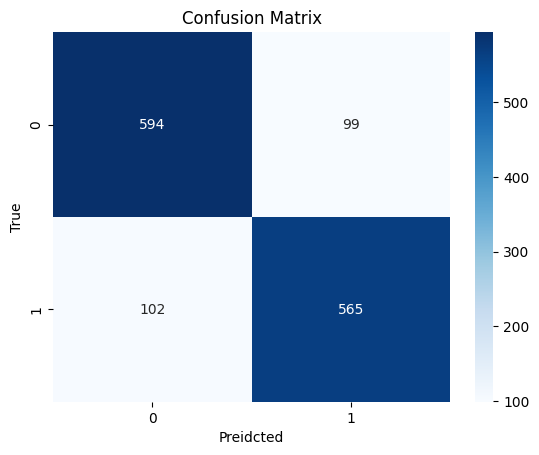

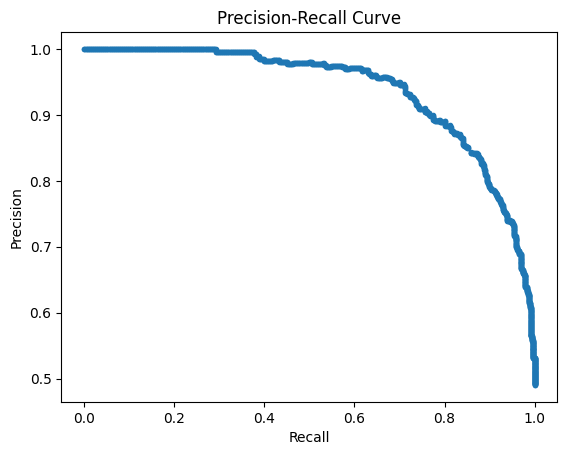

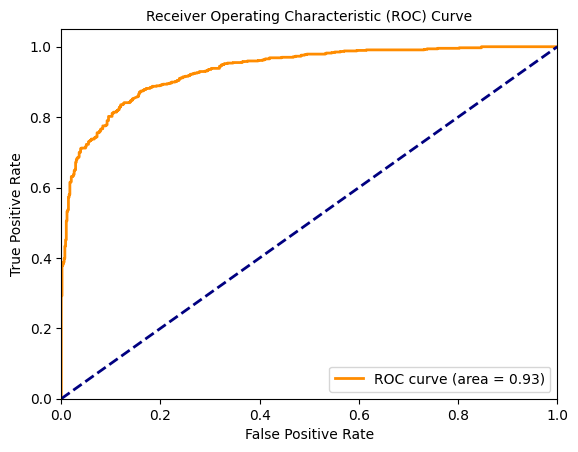




Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       693
           1       0.85      0.85      0.85       667

    accuracy                           0.85      1360
   macro avg       0.85      0.85      0.85      1360
weighted avg       0.85      0.85      0.85      1360

Accuracy: 0.85
F1 score: 0.85


In [ ]:
# Model training - SVM Classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_val)
y_pred_probabilities = svm_classifier.predict_proba(X_val)[:, 1]

# Model evaluation
model_evaluation(y_val, y_pred, y_pred_probabilities)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


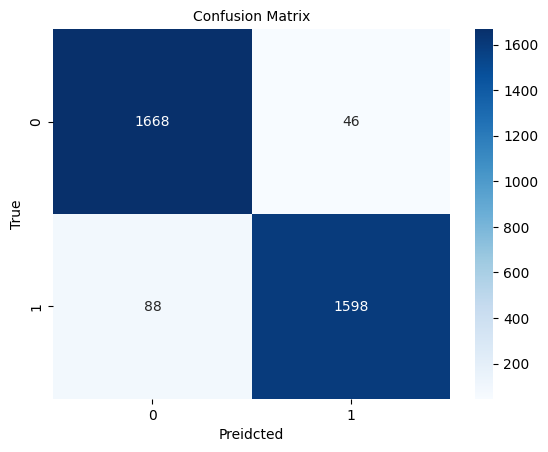

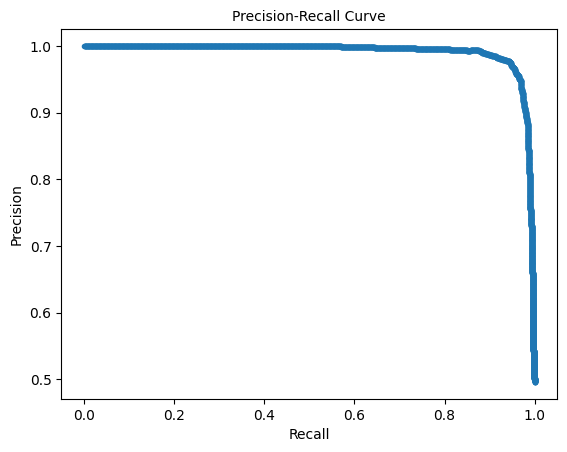

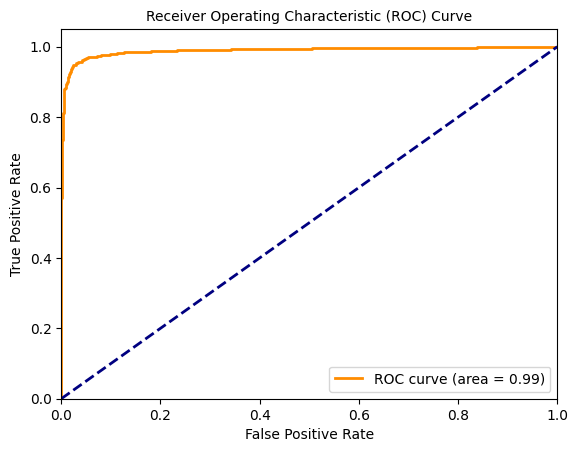




Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.97      0.95      0.96      1686

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400

Accuracy: 0.96
F1 score: 0.96


In [ ]:
# Model tuning
param_grid = {'C': [0.1, 1],
              'gamma': [0.1, 0.01],
              'kernel': ['rbf', 'poly']
              }

grid_search = GridSearchCV(SVC(probability=True), param_grid, n_jobs=-1, cv=3, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

best_svm_classifier = grid_search.best_estimator_
best_svm_classifier.fit(X_train, y_train)

y_pred_tuned = best_svm_classifier.predict(X_test)
y_pred_probabilities_tuned = best_svm_classifier.predict_proba(X_test)[:, 1]

model_evaluation(y_test, y_pred_tuned, y_pred_probabilities_tuned)

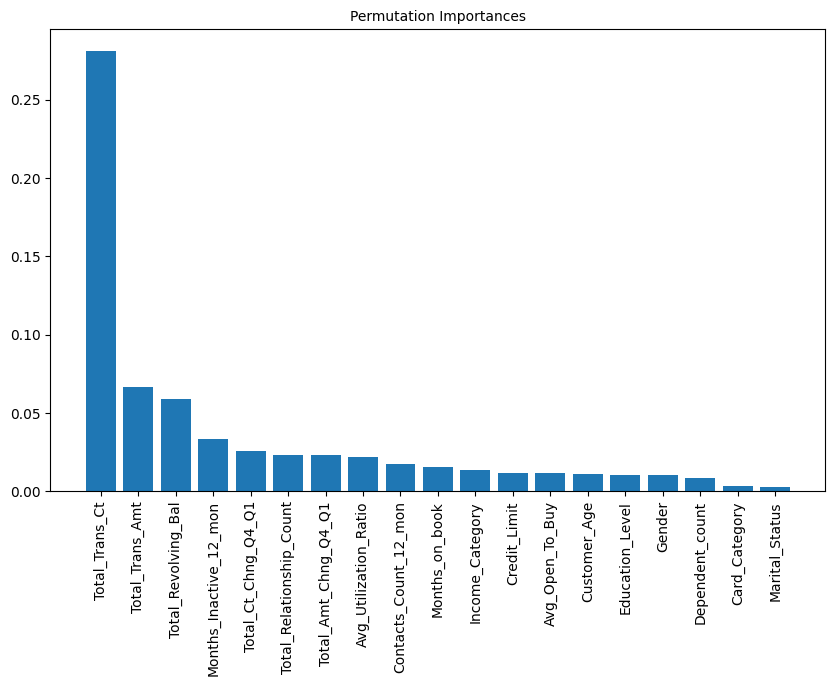

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
results = permutation_importance(best_svm_classifier, X_test, y_test, scoring='accuracy', n_repeats=30, random_state=42)
importances = results.importances_mean
indices = np.argsort(importances)[::-1]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.title("Permutation Importances")
plt.bar(range(X_test.shape[1]), importances[indices], align='center')
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1714
           1       0.86      0.86      0.86      1686

    accuracy                           0.86      3400
   macro avg       0.86      0.86      0.86      3400
weighted avg       0.86      0.86      0.86      3400

Confusion Matrix:
 [[1478  236]
 [ 228 1458]]
ROC-AUC Score:
 0.9385259346308608
Cross-Validation ROC-AUC Scores:
 [0.99607246 0.9951056  0.99716183 0.99666088 0.99717819]
Mean Cross-Validation ROC-AUC Score:
 0.9964357935827121
Cross-Validation ROC-AUC Scores:
 [0.93495935 0.93020412 0.94127227 0.93754568 0.93685016]
Mean Cross-Validation ROC-AUC Score:
 0.9361663165859999


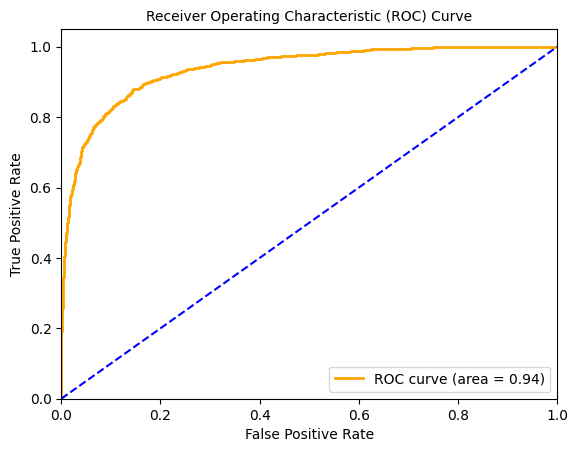

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)
y_pred_proba = model_logistic.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, y_pred_proba))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:\n", cv_scores)
print("Mean Cross-Validation ROC-AUC Score:\n", cv_scores.mean())

# Perform cross-validation and print the scores
cv_scores = cross_val_score(model_logistic, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:\n", cv_scores)
print("Mean Cross-Validation ROC-AUC Score:\n", cv_scores.mean())

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Exploration of churned customer characteristics**

In [ ]:
churn_analysis_df_encoded = df_impute.copy()

# Inverse the Scaled values back to original values
numerical_cols = churn_analysis_df_encoded.select_dtypes(include=['int64', 'float64']).columns
churn_analysis_df_encoded[numeric_cols] = scaler.inverse_transform(churn_analysis_df_encoded[numeric_cols])

# Create a new DataFrame to store the original values
churn_analysis_df = churn_analysis_df_encoded.copy()

for col in object_cols:
    # Inverse transform the encoded values back to original values
    churn_analysis_df[col] = label_encoders[col].inverse_transform(churn_analysis_df_encoded[col].astype(int))

churn_analysis_df.head()



Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer          45.0      M              3.0     High School   
1  Existing Customer          49.0      F              5.0        Graduate   
2  Existing Customer          51.0      M              3.0        Graduate   
4  Existing Customer          40.0      M              3.0      Uneducated   
5  Existing Customer          44.0      M              2.0        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue            39.0   
1         Single  Less than $40K          Blue            44.0   
2        Married    $80K - $120K          Blue            36.0   
4        Married     $60K - $80K          Blue            21.0   
5        Married     $40K - $60K          Blue            36.0   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       5.0                     1.0                    3.0   
1                       6.0                     1.0                    2.0   
2                       4.0                     1.0                    0.0   
4                       5.0                     1.0                    0.0   
5                       3.0                     1.0                    2.0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                777.0          11914.0                 1.335   
1        8256.0                864.0           7392.0                 1.541   
2        3418.0                  0.0           3418.0                 2.594   
4        4716.0                  0.0           4716.0                 2.175   
5        4010.0               1247.0           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0           1144.0            42.0                1.625                  0.061  
1           1291.0            33.0                3.714                  0.105  
2           1887.0            20.0                2.333                  0.000  
4            816.0            28.0                2.500                  0.000  
5           1088.0            24.0                0.846                  0.311

<ipython-input-31-7c3d374faacf>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(x = 'Customer_Age',data = churn_analysis_df,hue = 'Attrition_Flag',palette= sns.color_palette('bright'), hue_order=['Existing Customer','Attrited Customer'], multiple='stack')


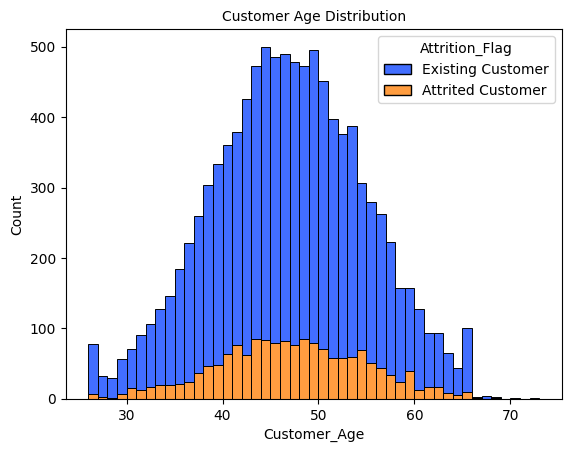

In [ ]:
sns.histplot(x = 'Customer_Age',data = churn_analysis_df,hue = 'Attrition_Flag',palette= sns.color_palette('bright'), hue_order=['Existing Customer','Attrited Customer'], multiple='stack')
plt.title('Customer Age Distribution')
plt.show()

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


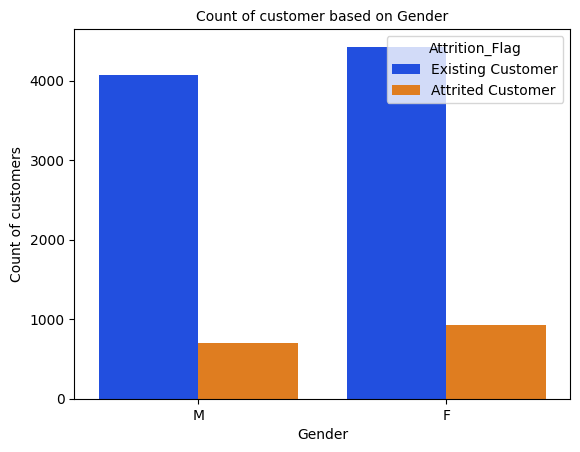

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


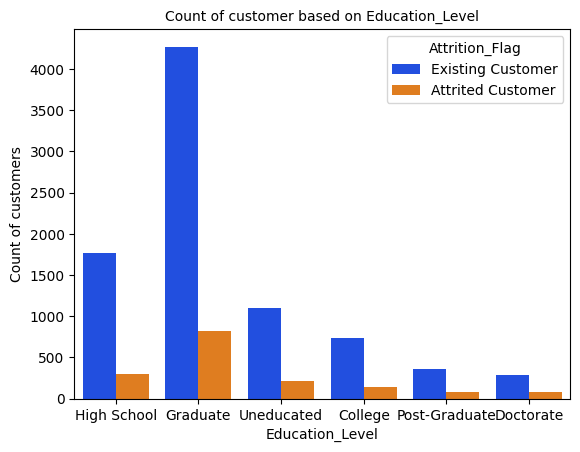

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


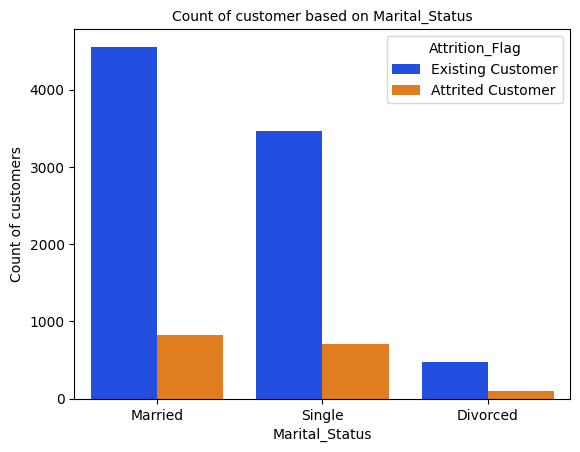

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


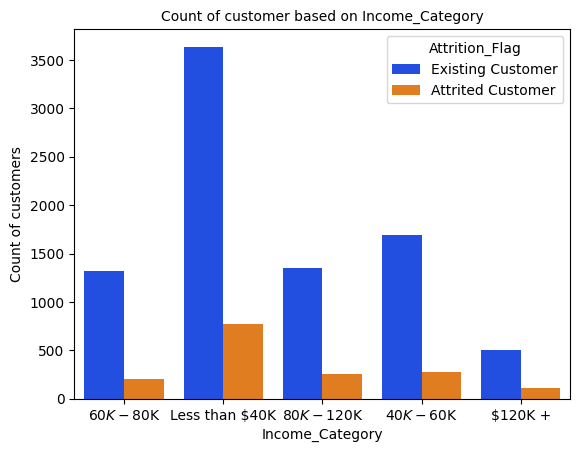

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


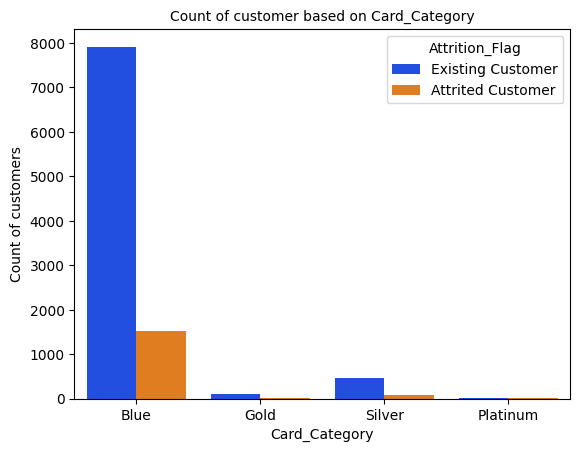

<ipython-input-32-aaaf40dd6870>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))


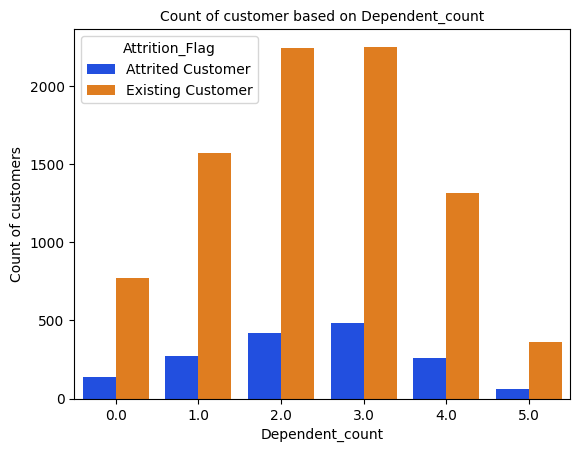

In [ ]:
col = churn_analysis_df.select_dtypes(include=['object']).columns[1:]
col = col.append(pd.Index(['Dependent_count']))

for variable in col:
  sns.countplot(data = churn_analysis_df, x = variable,hue = 'Attrition_Flag',palette= sns.color_palette('bright'))
  plt.title(f"Count of customer based on {variable}")
  plt.ylabel("Count of customers")
  plt.show()

In [ ]:
churn_customer_df = churn_analysis_df[churn_analysis_df['Attrition_Flag'] == 'Attrited Customer']
# churn_customer_df.drop(columns = ['CLIENTNUM'],inplace = True)
churn_customer_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
21   Attrited Customer          62.0      F              0.0        Graduate   
51   Attrited Customer          54.0      F              1.0        Graduate   
54   Attrited Customer          56.0      M              2.0        Graduate   
61   Attrited Customer          48.0      M              2.0        Graduate   
127  Attrited Customer          53.0      M              2.0        Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
21         Married  Less than $40K          Blue            49.0   
51         Married  Less than $40K          Blue            40.0   
54         Married         $120K +          Blue            36.0   
61         Married     $60K - $80K        Silver            35.0   
127        Married    $80K - $120K          Blue            41.0   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21                        2.0                     3.0                    3.0   
51                        2.0                     3.0                    1.0   
54                        1.0                     3.0                    3.0   
61                        2.0                     4.0                    4.0   
127                       3.0                     3.0                    2.0   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
21         1438.3                  0.0           1438.3                 1.047   
51         1438.3                808.0            630.3                 0.997   
54        15769.0                  0.0          15769.0                 1.041   
61        34516.0                  0.0          34516.0                 0.763   
127       11669.0               2227.0           9442.0                 0.622   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
21             692.0            16.0                0.600   
51             705.0            19.0                0.900   
54             602.0            15.0                0.364   
61             691.0            15.0                0.500   
127            720.0            23.0                0.353   

     Avg_Utilization_Ratio  
21                   0.000  
51                   0.562  
54                   0.000  
61                   0.000  
127                  0.191

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


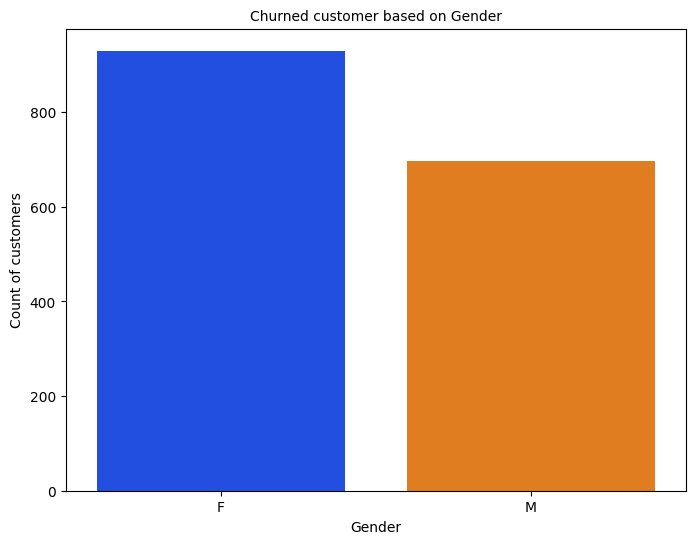

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


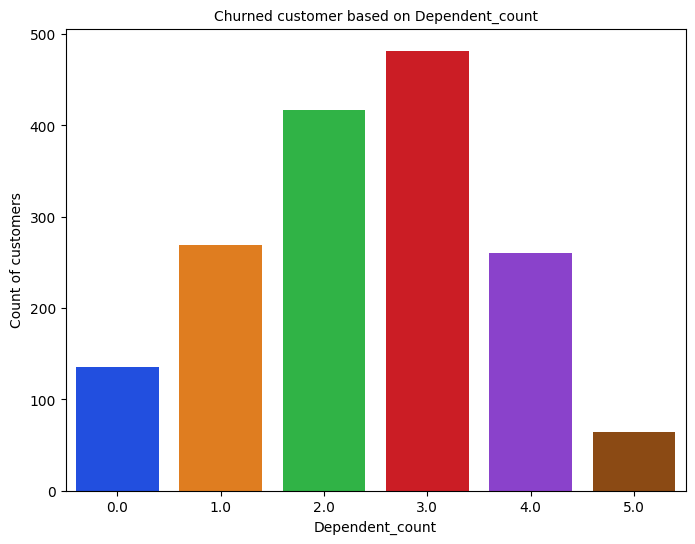

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


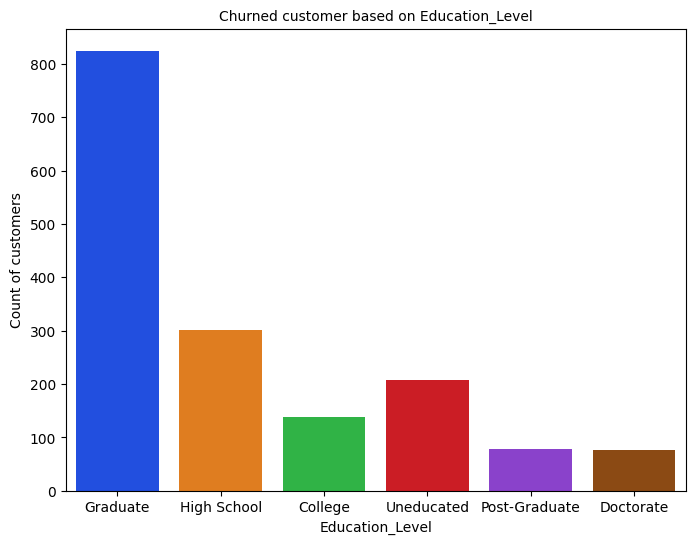

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


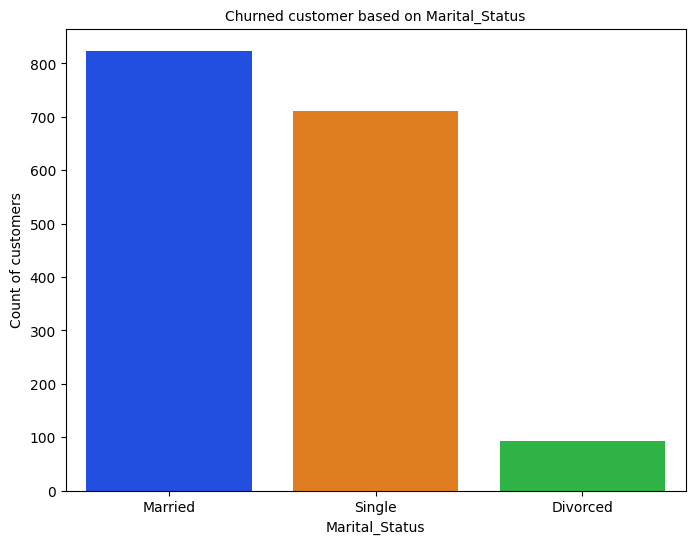

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


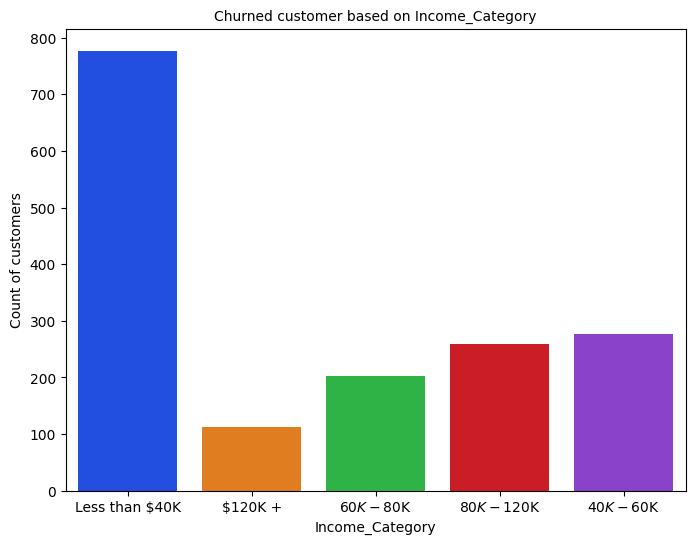

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


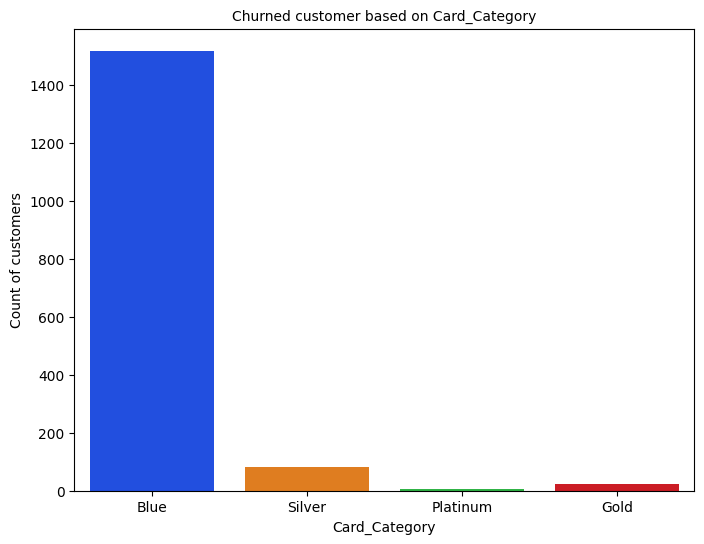

<ipython-input-35-6cc33d2c205b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
<ipython-input-35-6cc33d2c205b>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))


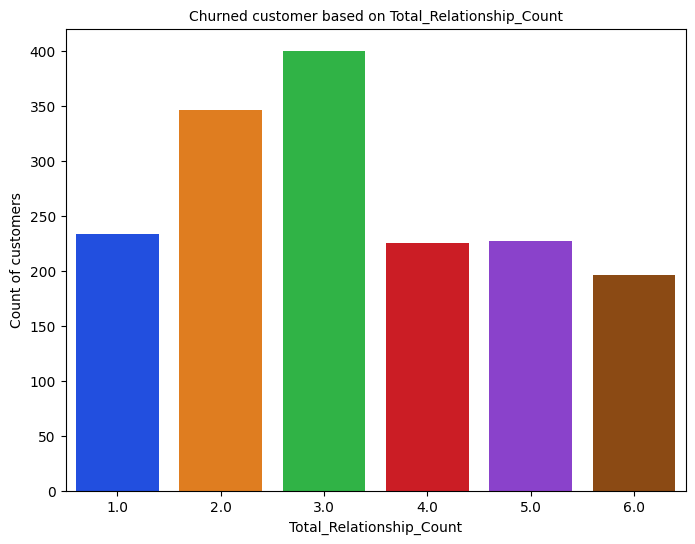

In [ ]:
col = churn_customer_df.columns[2:8]
col = col.append(pd.Index(['Total_Relationship_Count']))

for variable in col:
  plt.figure(figsize=(8,6))
  sns.countplot(data = churn_customer_df, x = variable,palette= sns.color_palette('bright'))
  plt.title(f"Churned customer based on {variable}")
  plt.ylabel("Count of customers")
  plt.show()

<ipython-input-36-7971179b65f8>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data = churn_customer_df,x = 'Customer_Age',hue = 'Gender',palette= sns.color_palette("bright"),alpha = 0.4, hue_order=['M','F'], multiple='stack')


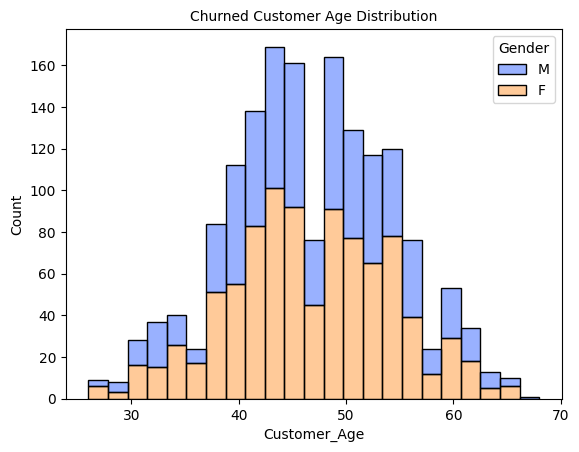

In [ ]:
sns.histplot(data = churn_customer_df,x = 'Customer_Age',hue = 'Gender',palette= sns.color_palette("bright"),alpha = 0.4, hue_order=['M','F'], multiple='stack')
plt.title('Churned Customer Age Distribution')
plt.show()

In [ ]:
churn_customer_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

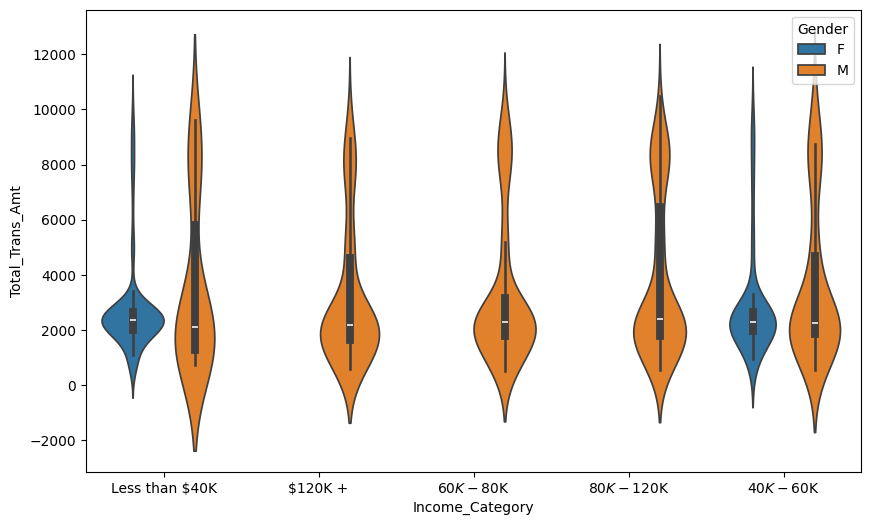

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x='Income_Category',y='Total_Trans_Amt',data=churn_customer_df,hue='Gender')
plt.show()

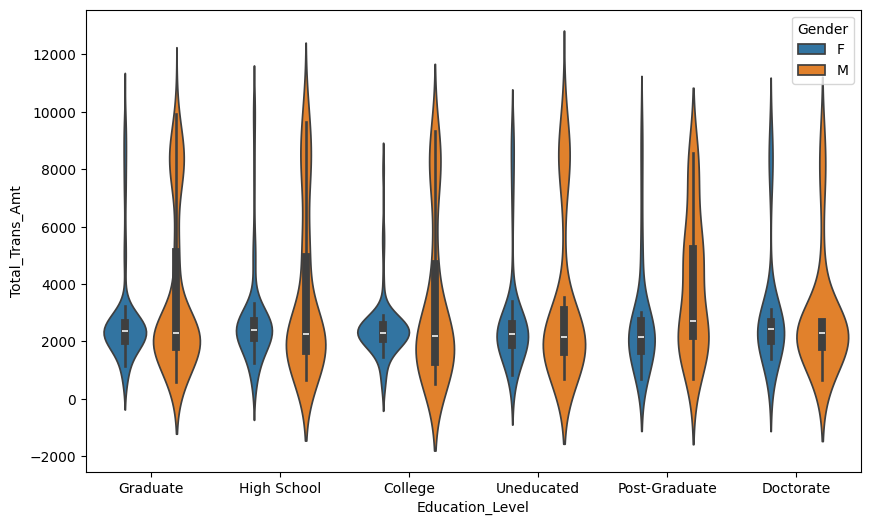

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x='Education_Level',y='Total_Trans_Amt',data=churn_customer_df,hue='Gender')
plt.show()

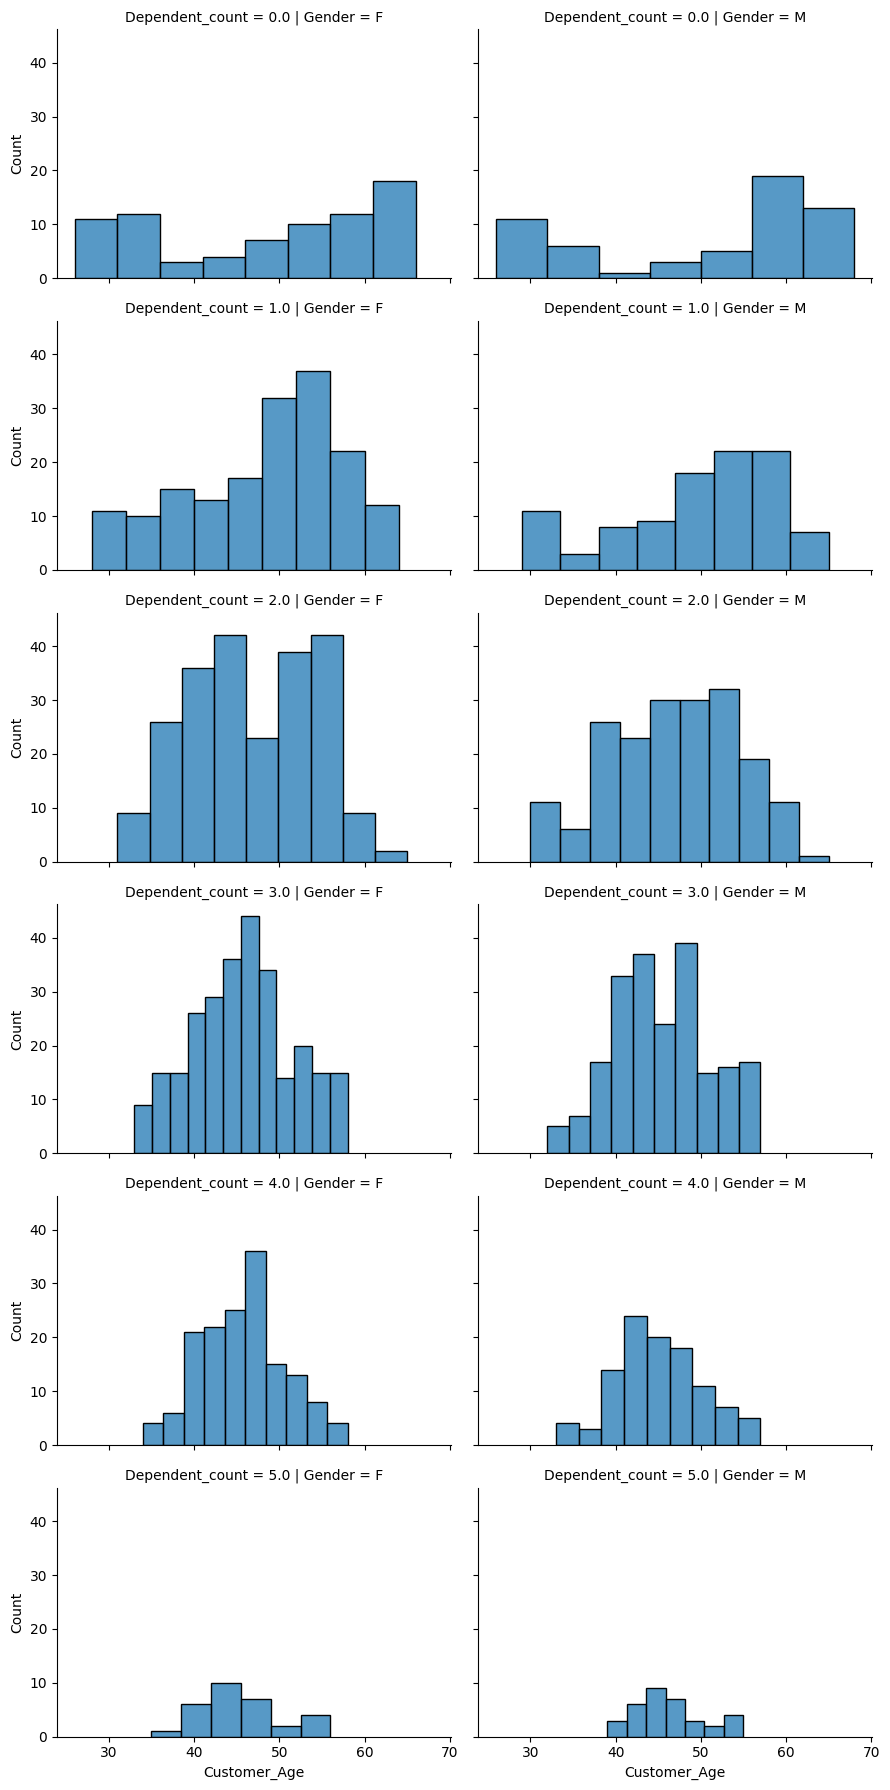

In [ ]:
g = sns.FacetGrid(data=churn_customer_df,col = 'Gender',row= 'Dependent_count', height=3, aspect=1.5)
g.map(sns.histplot,'Customer_Age')

In [ ]:
churn_analysis_df.to_csv('churn_analysis_df.csv',index=False)

# **Customer Segmentation**

Determine the characteristics of active customer

In [ ]:
#Preparing dataset for clustering
df_cluster = df_impute.drop(columns=['Attrition_Flag'])
df_cluster

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0         -0.165406       1         0.503368                3               1   
1          0.333570       0         2.043199                2               2   
2          0.583058       1         0.503368                2               1   
4         -0.789126       1         0.503368                5               1   
5         -0.290150       1        -0.266547                2               1   
...             ...     ...              ...              ...             ...   
10101     -0.539638       1        -0.266547                2               1   
10118      0.458314       1        -1.036462                3               2   
10119      1.082034       0         0.503368                3               2   
10123     -0.664382       1        -0.266547                2               1   
10125     -2.036565       1        -0.266547                2               2   

       Income_Category  Card_Category  Months_on_book  \
0                    2              0        0.384621   
1                    4              0        1.010715   
2                    3              0        0.008965   
4                    2              0       -1.869317   
5                    1              0        0.008965   
...                ...            ...             ...   
10101                1              0       -0.742348   
10118                3              0        0.008965   
10119                1              0        1.386371   
10123                3              0       -1.368442   
10125                2              0        0.008965   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
4                      0.763943               -1.327136   
5                     -0.522785               -1.327136   
...                         ...                     ...   
10101                 -0.522785               -0.337598   
10118                  1.407306                0.651940   
10119                  0.120579                0.651940   
10123                  0.120579               -0.337598   
10125                  0.120579                0.651940   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
4                  -2.219655     -0.430877            -1.426858   
5                  -0.411616     -0.508559             0.103302   
...                      ...           ...                  ...   
10101               2.300443     -0.538818             0.687389   
10118               1.396424      0.146017            -0.258684   
10119               0.492404      0.662943             1.661686   
10123               0.492404     -0.479181             1.255524   
10125               0.492404     -0.368710            -1.426858   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
5            -0.517714              2.810542        -0.976192       -1.740786   
...                ...                   ...              ...             ...   
10101        -0.600330             -0.752480         2.972337        1.156356   
10118         0.169177              0.296809         1.738587       -0.079190   
10119         0.513833             -2.709633         0.472456       -0.505240   
10123        -0.591639   

In [ ]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca.fit(df_cluster)
PCA_df = pd.DataFrame(pca.transform(df_cluster), columns=(["dim1","dim2", "dim3"]))
PCA_df.describe().T


count          mean       std       min       25%       50%       75%  \
dim1  10127.0 -8.980890e-17  1.762547 -3.046111 -1.300859 -0.348996  0.969544   
dim2  10127.0  4.490445e-17  1.450307 -4.288106 -0.983398 -0.082976  0.814273   
dim3  10127.0  8.980890e-17  1.343811 -4.452650 -0.895425 -0.013507  0.879514   

           max  
dim1  6.233471  
dim2  5.413474  
dim3  4.466321

In [ ]:
import plotly.express as px

# 3D plotting
fig = px.scatter_3d(PCA_df, x='dim1', y='dim2', z='dim3', color_discrete_sequence=['blue'])

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="3D Projection Of Data In The Reduced Dimension", height=600, width=800)
fig.show()

## KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

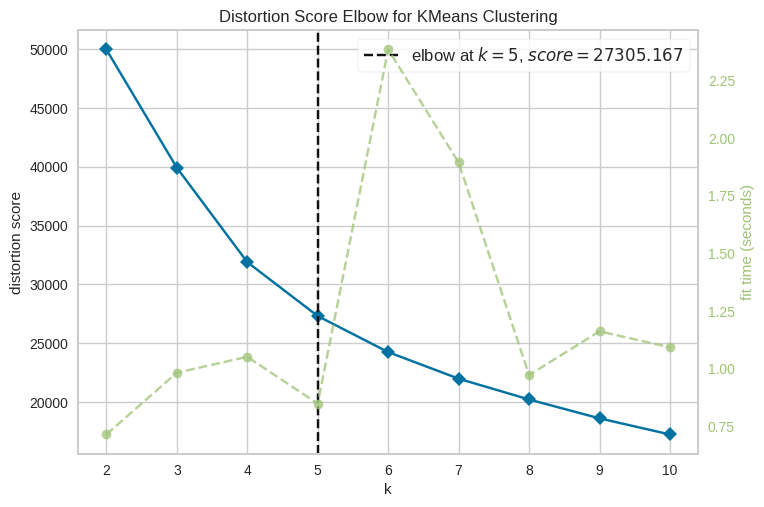

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Determine the number of clusters using the Elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [ ]:
#define the model
model = KMeans(n_clusters=5)
model.fit(PCA_df)
pred = model.predict(PCA_df)

# result
# adding the Clusters feature to the PCA dataframe.
PCA_df['Clusters'] = pred
PCA_df['Clusters'] = PCA_df['Clusters'].astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
specific_numerical_cols = [ "Customer_Age", "Dependent_count", "Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio" ]

# Make a copy of the scaled DataFrame to inverse transform
churn_analysis_df_encoded = df_impute.copy()

# Inverse transform the specific numerical columns
churn_analysis_df_encoded[specific_numerical_cols] = scaler.inverse_transform(churn_analysis_df_encoded[specific_numerical_cols])


# View the inversely transformed DataFrame
churn_analysis_df_encoded

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1          45.0       1              3.0                3   
1                   1          49.0       0              5.0                2   
2                   1          51.0       1              3.0                2   
4                   1          40.0       1              3.0                5   
5                   1          44.0       1              2.0                2   
...               ...           ...     ...              ...              ...   
10101               1          42.0       1              2.0                2   
10118               0          50.0       1              1.0                3   
10119               0          55.0       0              3.0                3   
10123               0          41.0       1              2.0                2   
10125               0          30.0       1              2.0                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0            39.0   
1                   2                4              0            44.0   
2                   1                3              0            36.0   
4                   1                2              0            21.0   
5                   1                1              0            36.0   
...               ...              ...            ...             ...   
10101               1                1              0            30.0   
10118               2                3              0            36.0   
10119               2                1              0            47.0   
10123               1                3              0            25.0   
10125               2                2              0            36.0   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                           5.0                     1.0   
1                           6.0                     1.0   
2                           4.0                     1.0   
4                           5.0                     1.0   
5                           3.0                     1.0   
...                         ...                     ...   
10101                       3.0                     2.0   
10118                       6.0                     3.0   
10119                       4.0                     3.0   
10123                       4.0                     2.0   
10125                       4.0                     3.0   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                        3.0       12691.0                777.0   
1                        2.0        8256.0                864.0   
2                        0.0        3418.0                  0.0   
4                        0.0        4716.0                  0.0   
5                        2.0        4010.0               1247.0   
...                      ...           ...                  ...   
10101                    5.0        3735.0               1723.0   
10118                    4.0        9959.0                952.0   
10119                    3.0       14657.0               2517.0   
10123                    3.0        4277.0               2186.0   
10125                    3.0        5281.0                  0.0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335           1144.0            42.0   
1               7392.0                 1.541           1291.0            33.0   
2               3418.0                 2.594           1887.0            20.0   
4               4716.0                 2.175            816.0            28.0   
5               2763.0                 1.376           1088.0            24.0   
...                ...                   ...              ...             ...   
10101           2012.0                 0.595          14501.0            92.

In [ ]:
# adding the Clusters feature to the orignal dataframe.
churn_analysis_df_encoded['Clusters'] = pred
churn_analysis_df_encoded['Clusters'] = churn_analysis_df_encoded['Clusters'].astype(str)
churn_analysis_df_encoded

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1          45.0       1              3.0                3   
1                   1          49.0       0              5.0                2   
2                   1          51.0       1              3.0                2   
4                   1          40.0       1              3.0                5   
5                   1          44.0       1              2.0                2   
...               ...           ...     ...              ...              ...   
10101               1          42.0       1              2.0                2   
10118               0          50.0       1              1.0                3   
10119               0          55.0       0              3.0                3   
10123               0          41.0       1              2.0                2   
10125               0          30.0       1              2.0                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0            39.0   
1                   2                4              0            44.0   
2                   1                3              0            36.0   
4                   1                2              0            21.0   
5                   1                1              0            36.0   
...               ...              ...            ...             ...   
10101               1                1              0            30.0   
10118               2                3              0            36.0   
10119               2                1              0            47.0   
10123               1                3              0            25.0   
10125               2                2              0            36.0   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                           5.0  ...                    3.0       12691.0   
1                           6.0  ...                    2.0        8256.0   
2                           4.0  ...                    0.0        3418.0   
4                           5.0  ...                    0.0        4716.0   
5                           3.0  ...                    2.0        4010.0   
...                         ...  ...                    ...           ...   
10101                       3.0  ...                    5.0        3735.0   
10118                       6.0  ...                    4.0        9959.0   
10119                       4.0  ...                    3.0       14657.0   
10123                       4.0  ...                    3.0        4277.0   
10125                       4.0  ...                    3.0        5281.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                    777.0          11914.0                 1.335   
1                    864.0           7392.0                 1.541   
2                      0.0           3418.0                 2.594   
4                      0.0           4716.0                 2.175   
5                   1247.0           2763.0                 1.376   
...                    ...              ...                   ...   
10101               1723.0           2012.0                 0.595   
10118                952.0           9007.0                 0.825   
10119               2517.0          12140.0                 0.166   
10123               2186.0           2091.0                 0.804   
10125                  0.0           5281.0                 0.535   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1144.0            42.0                1.625   
1               1291.0            33.0                3.714   
2               1887.0            20.0                2.333   
4                816.0            28.0                2.500   
5               1088.0            24.0                0.846   
...                ...   

In [ ]:
# Plotting the clusters

colors = ["green","blue","yellow","orange","purple"]

fig = px.scatter_3d(PCA_df, x='dim1', y='dim2', z='dim3',
              color='Clusters',color_discrete_sequence=colors, opacity=0.6, symbol = 'Clusters')

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="Plot of Clusters", height=600, width=800)
fig.show()

Analysing Category

In [ ]:
fig = px.histogram(churn_analysis_df_encoded, x='Clusters', color='Clusters', color_discrete_sequence=colors)
fig.show()

In [ ]:
import plotly.express as px

# Specify the features for which you want to generate box plots
features = ["Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]

# Loop through each specified feature
for feature in features:
    fig = px.box(churn_analysis_df_encoded, x="Clusters", y=feature,
                 color='Clusters', color_discrete_sequence=colors, points='all')
    fig.update_yaxes(title_text=feature.replace('_', ' ').title())  # Replace '_' with space and capitalize the feature name for y-axis label
    fig.update_xaxes(title_text="Clusters")
    fig.show()


Profiling Customers

In [ ]:
category = ["Gender", "Marital_Status", "Months_Inactive_12_mon","Contacts_Count_12_mon","Customer_Age", "Months_on_book", "Dependent_count", "Education_Level", "Income_Category", "Total_Relationship_Count", 'Attrition_Flag',"Card_Category","Credit_Limit"]

for i in category:
    plt.figure()
    sns.jointplot(x=churn_analysis_df_encoded[i], y=churn_analysis_df_encoded["Total_Trans_Amt"], hue =churn_analysis_df_encoded["Clusters"], kind="kde", palette=colors)
    plt.show()

This cell output is too large and can only be displayed while logged in.


**Category 0**
*   Younger Demographic: This category consists of younger customers who have moderate tenure (10-40 months).
*   High Financial Activity: Highly active with their accounts, making the second highest number of transactions
*   Credit Limit and Utilization: Having a higher credit limit up to 30,000 and high revolving balance, suggesting they are active users of credit products.

**Category 1**
*   Older Demographic: This category consists of older customers who have been with the institution for a relatively long time (30-60 months).
*   Moderate Financial Activity: With moderate inactive months and the second-lowest dependent count, these customers may have moderate engagement with financial products.
*   Credit Limit and Utilization: Having a lower credit limit and the lowest open-to-buy amount suggests they may be more cautious with their credit use or have less access to higher credit limits.

**Category 2**
*   Broad Age Range: This category includes a wide range of ages from young to middle-aged adults.
*   Shorter Relationship Tenure: These customers have a shorter history with the institution (10-50 months), which could imply newer or less loyal customers.
*   Lower Income and Credit Limits: With lower incomes and credit limits, these customers might be more financially constrained.
*   Few Dependents: Having fewer dependents might indicate either younger families or single individuals.


**Category 3**
*   Highly Active Customers: This category is characterized by the highest transaction amounts and counts, indicating highly engaged customers.
*   Moderate Tenure: These customers have been with the institution for a moderate amount of time (20-50 months).
*   Loyal Customers: The highest ratio of existing customers to churned customers suggests strong loyalty.
*   Financial Activity: They have the highest revolving balance, indicating heavy use of credit but maintaining a slightly low utilization ratio.

**Category 4**
*   Middle-Aged: They fall into a middle-aged bracket (30-60) with a substantial relationship history (30-60 months).
*   Financially Stable and Active: These customers have high open-to-buy amounts and low utilization ratios, suggesting good financial management and stability.
*   High Income and Credit Limit: They have relatively high incomes and the highest credit limits, indicating a financially robust customer segment.
*   Engaged Customers: With the second-lowest inactive months, these customers are quite engaged with their financial activities.


**General Conclusions and Insights:**

Category 0 comprises younger, highly active customers utilizing higher credit limits

Category 1 consists of older, cautious users with lower credit limits.

Category 2 represents a broad age range with lower incomes and credit limits, suggesting financial constraints.

Category 3 denotes highly active customers with heavy credit use but moderate tenure.

Category 4 embodies financially stable, middle-aged individuals with high incomes and credit limits, actively engaging in financial activities.

## GMeans Clustering

In [ ]:
pip install g-means

ERROR: Could not find a version that satisfies the requirement g-means (from versions: none)
ERROR: No matching distribution found for g-means


In [ ]:
# According to the BIC and AIC graph
optimal_n_components = 2

# Fit the final GMM model
gmm_model = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=42)
pred_GMM = gmm_model.fit_predict(PCA_df)
PCA_df['Clusters'] = pred_GMM

# Convert clusters to string type for better visualization
PCA_df['Clusters'] = PCA_df['Clusters'].astype(str)

# Visualize the clusters
colors = ["green", "blue", "yellow", "orange", "purple"]
fig = px.scatter_3d(PCA_df, x='dim1', y='dim2', z='dim3', color='Clusters', color_discrete_sequence=colors, opacity=0.6, symbol='Clusters')
fig.update_traces(marker=dict(size=2))
fig.update_layout(title="Plot of GMM Clusters", height=600, width=800)
fig.show()


In [ ]:
# adding the Clusters feature to the orignal dataframe.
churn_analysis_df_encoded_GMM = churn_analysis_df_encoded.copy()
churn_analysis_df_encoded_GMM['Clusters'] = pred_GMM
churn_analysis_df_encoded_GMM['Clusters'] = churn_analysis_df_encoded_GMM['Clusters'].astype(str)
churn_analysis_df_encoded_GMM

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1          45.0       1              3.0                3   
1                   1          49.0       0              5.0                2   
2                   1          51.0       1              3.0                2   
4                   1          40.0       1              3.0                5   
5                   1          44.0       1              2.0                2   
...               ...           ...     ...              ...              ...   
10101               1          42.0       1              2.0                2   
10118               0          50.0       1              1.0                3   
10119               0          55.0       0              3.0                3   
10123               0          41.0       1              2.0                2   
10125               0          30.0       1              2.0                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0            39.0   
1                   2                4              0            44.0   
2                   1                3              0            36.0   
4                   1                2              0            21.0   
5                   1                1              0            36.0   
...               ...              ...            ...             ...   
10101               1                1              0            30.0   
10118               2                3              0            36.0   
10119               2                1              0            47.0   
10123               1                3              0            25.0   
10125               2                2              0            36.0   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                           5.0  ...                    3.0       12691.0   
1                           6.0  ...                    2.0        8256.0   
2                           4.0  ...                    0.0        3418.0   
4                           5.0  ...                    0.0        4716.0   
5                           3.0  ...                    2.0        4010.0   
...                         ...  ...                    ...           ...   
10101                       3.0  ...                    5.0        3735.0   
10118                       6.0  ...                    4.0        9959.0   
10119                       4.0  ...                    3.0       14657.0   
10123                       4.0  ...                    3.0        4277.0   
10125                       4.0  ...                    3.0        5281.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                    777.0          11914.0                 1.335   
1                    864.0           7392.0                 1.541   
2                      0.0           3418.0                 2.594   
4                      0.0           4716.0                 2.175   
5                   1247.0           2763.0                 1.376   
...                    ...              ...                   ...   
10101               1723.0           2012.0                 0.595   
10118                952.0           9007.0                 0.825   
10119               2517.0          12140.0                 0.166   
10123               2186.0           2091.0                 0.804   
10125                  0.0           5281.0                 0.535   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1144.0            42.0                1.625   
1               1291.0            33.0                3.714   
2               1887.0            20.0                2.333   
4                816.0            28.0                2.500   
5               1088.0            24.0                0.846   
...                ...   

In [ ]:
fig = px.histogram(churn_analysis_df_encoded_GMM, x='Clusters', color='Clusters', color_discrete_sequence=colors)
fig.show()

In [ ]:
# Specify the features for which you want to generate box plots
features = ["Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]

# Loop through each specified feature
for feature in features:
    fig = px.box(churn_analysis_df_encoded_GMM, x="Clusters", y=feature,
                 color='Clusters', color_discrete_sequence=colors, points='all')
    fig.update_yaxes(title_text=feature.replace('_', ' ').title())  # Replace '_' with space and capitalize the feature name for y-axis label
    fig.update_xaxes(title_text="Clusters")
    fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

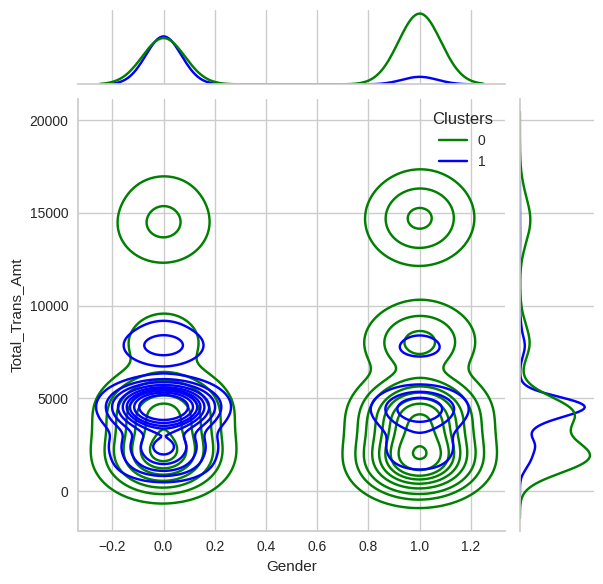

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

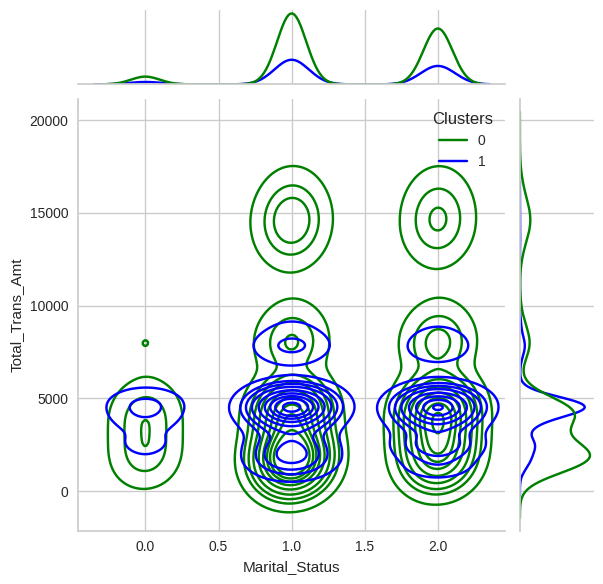

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

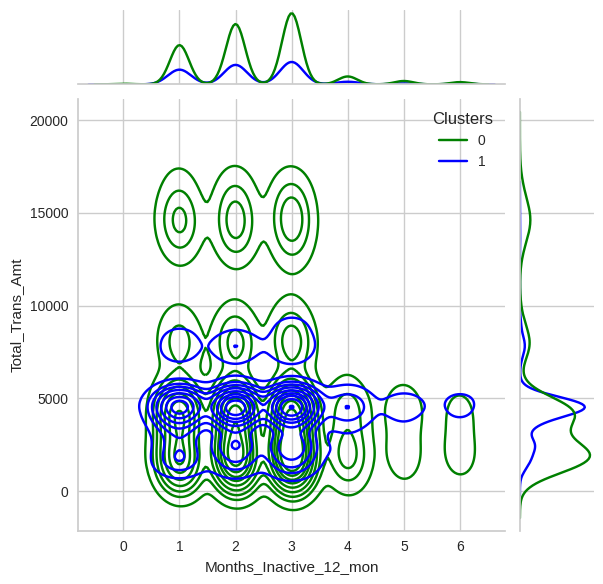

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

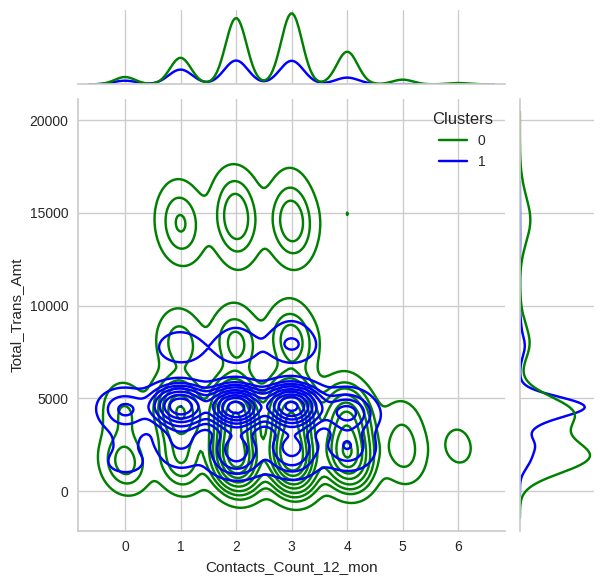

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

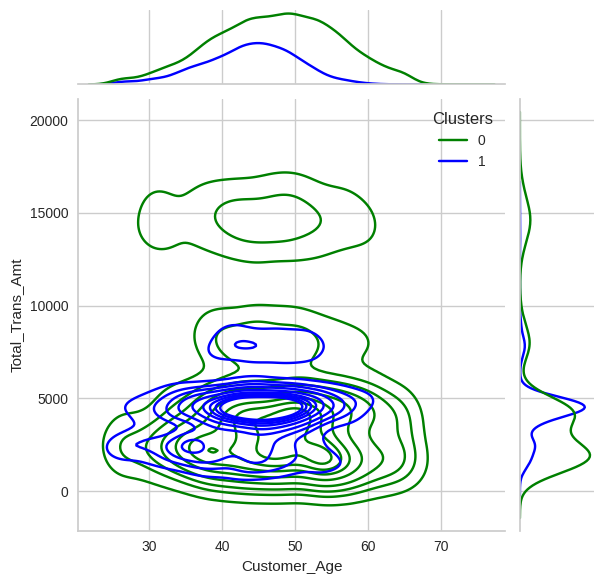

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

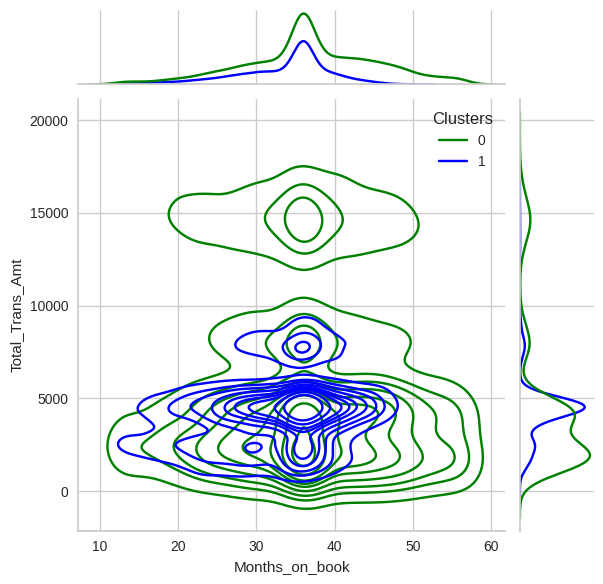

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

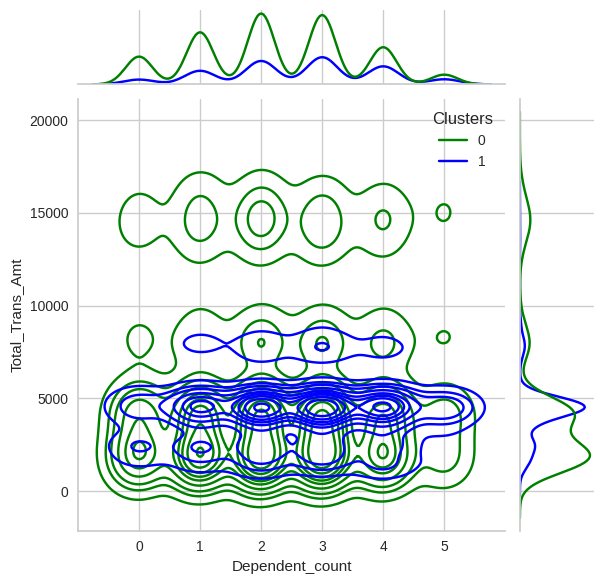

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

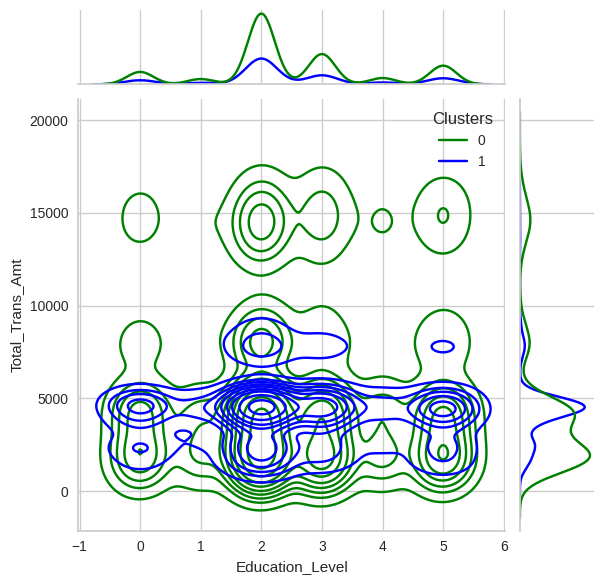

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

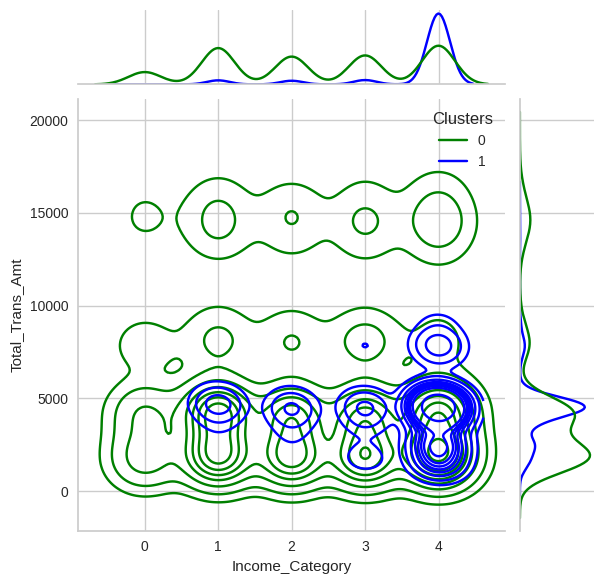

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

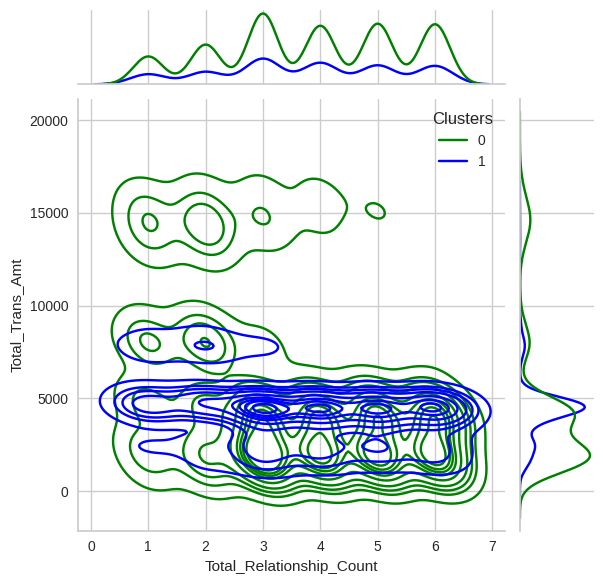

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

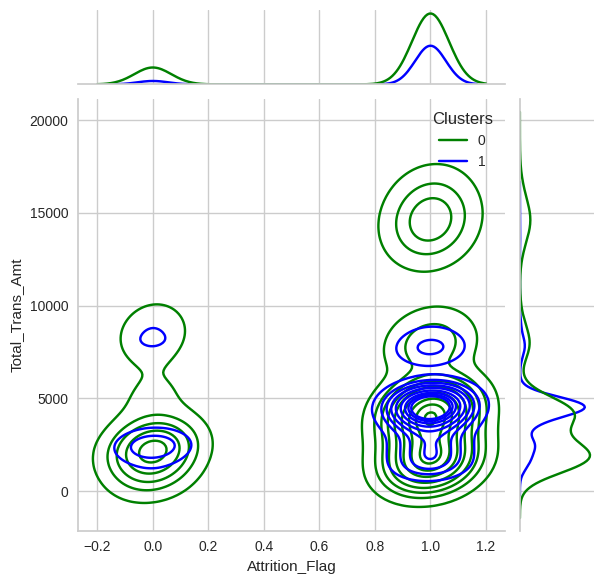

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

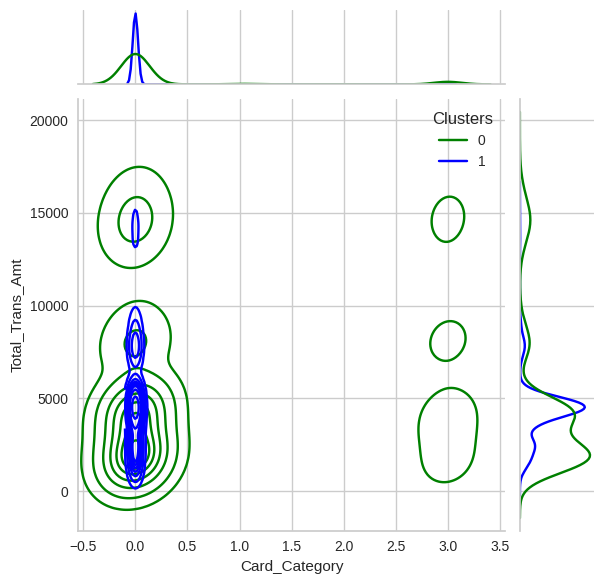

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



<Figure size 800x550 with 0 Axes>

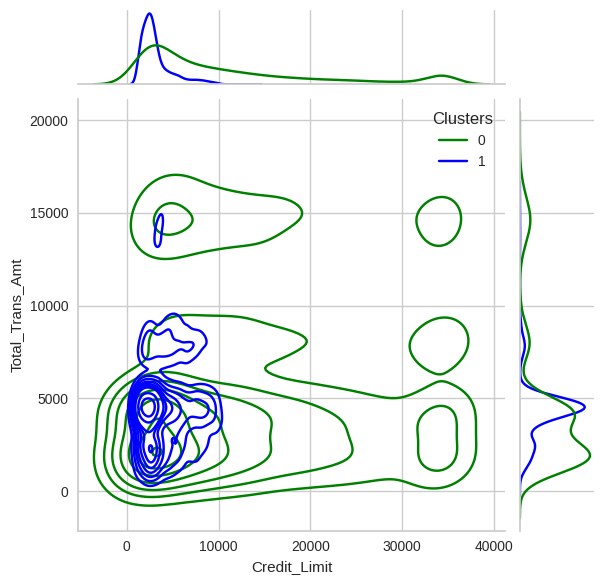

In [ ]:
category = ["Gender", "Marital_Status", "Months_Inactive_12_mon","Contacts_Count_12_mon","Customer_Age", "Months_on_book", "Dependent_count", "Education_Level", "Income_Category", "Total_Relationship_Count", 'Attrition_Flag',"Card_Category","Credit_Limit"]

for i in category:
    plt.figure()
    sns.jointplot(x=churn_analysis_df_encoded_GMM[i], y=churn_analysis_df_encoded_GMM["Total_Trans_Amt"], hue =churn_analysis_df_encoded_GMM["Clusters"], kind="kde", palette=colors)
    plt.show()

**Category 0**
*   Transaction Activity: Higher transaction amount and count.
*   Credit Management: Higher open to buy, lower utilization ratio.
*   Demographics: Age 30-60, months on book 20-50, dependent count 0-5.
*   Customer Loyalty: Higher existing customer ratio.
*   Credit Limits: Higher credit limit.
*   Engagement: Lower inactive month, contact count 1-4.


**Category 1**
*   Transaction Activity: Lower transaction amount and count.
*   Credit Management: Lower open to buy, higher utilization ratio.
*   Credit Limits: Lower credit limit.
*   Engagement: Broader contact count 0-6.

**General Findings**

Cluster 0 consists of financially stable, middle-aged customers (30-60 years) with high transaction activity, high credit limits, and low utilization ratios, showing strong engagement and credit management.

Cluster 1 includes a broader age range (20-70 years) with lower transaction activity, lower credit limits, and higher utilization ratios, indicating financial constraints and varied engagement levels.